In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
# importing data from CSV
df = pd.read_csv('fullCleanData2.csv')
loan_data = pd.read_csv('fullCleanData2.csv')

In [4]:
# Cleaning Data
loan_data['LoanStatus']= loan_data['LoanStatus'].str.replace(' ', '_')
loan_data["Borrower"] = loan_data["Borrower"].str.lower()
loan_data["LoanStatus"] = loan_data["LoanStatus"].str.lower()

In [5]:
# Sample the data 
from sklearn.model_selection import train_test_split
loan_X = loan_data[["InterestRate","CurrentGDP",
                    "OriginalPrincipalAmount",
                    "employemt","export",
                    "timeToRepay","electricity",
                    "incomePC","gdpRate"]]

loan_Y = loan_data['LoanStatus']

loan_X_train, loan_X_test, loan_Y_train, loan_Y_test = train_test_split(loan_X, loan_Y, test_size=.3)
loan_Y_train = pd.get_dummies(loan_Y_train)
loan_Y_test = pd.get_dummies(loan_Y_test)

## Linear Regression

In [67]:
# Linear Regression prediction
regr = linear_model.LinearRegression()
regr.fit(loan_X_train, loan_Y_train)
loan_Y_pred = regr.predict(loan_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(loan_Y_test, loan_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(loan_Y_test, loan_Y_pred))

Coefficients: 
 [[ -1.80125532e-02   1.11762210e-13  -3.44071760e-11   1.57534529e-03
   -5.02799197e-13   3.49147860e-04  -1.52851494e-06   4.17884591e-06
    2.06614615e-04]
 [  1.80125532e-02  -1.11762210e-13   3.44071760e-11  -1.57534529e-03
    5.02799197e-13  -3.49147860e-04   1.52851494e-06  -4.17884591e-06
   -2.06614615e-04]]
Mean squared error: 0.10
Variance score: 0.06


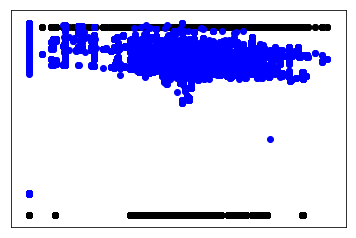

In [68]:
# Linear regression plots 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import numpy
from sklearn.metrics import mean_squared_error, r2_score
loan_Y_Pred = numpy.transpose(loan_Y_pred)
# Plot outputs
plt.scatter(loan_X_test['employemt'], loan_Y_test['fully_repaid'],  color='black')
plt.scatter(loan_X_test['employemt'], loan_Y_Pred[1], color='blue')


plt.xticks(())
plt.yticks(())

plt.show()


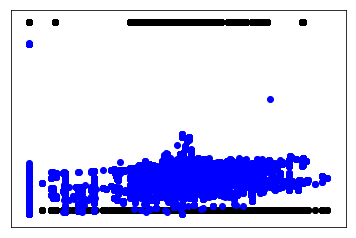

In [69]:
# Linear Regresssion Plot outputs
plt.scatter(loan_X_test['employemt'], loan_Y_test['cancelled'],  color='black')
plt.scatter(loan_X_test['employemt'], loan_Y_Pred[0], color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [87]:
# Logistic Regression
# loan_X_train, loan_X_test, loan_Y_train, loan_Y_test = train_test_split(loan_X, loan_Y, test_size=.3)
#logistic = linear_model.LogisticRegression()
#logistic.fit(loan_X_train, loan_Y_train)

## KNN

In [8]:
# KNN Accuracy is good 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_score = knn.fit(loan_X_train, loan_Y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
loan_Y_pred = knn.predict(loan_X_test)
loan_Y_pred_df=pd.DataFrame(loan_Y_pred, columns=['cancelled','fully_repaid'])

print(accuracy_score(loan_Y_test, loan_Y_pred))
#y_pred_val = neigh.predict(X_val)
#print (accuracy_score(loan_Y_test.to_matrix(), loan_Y_pred))




0.998656395557


In [24]:
loan_Y_test_matrix = loan_Y_test.as_matrix()
#|loan_Y_pred
loan_Y_test_matrix
loan_Y_pred
loan_Y_test_matrix[9][1]


1

In [29]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(loan_Y_test_matrix)):
    fpr[i], tpr[i], _ = metrics.roc_curve(loan_Y_test_matrix[i][0], loan_Y_pred[i][0])
    roc_auc[i] = auc(fpr[i], tpr[i])

TypeError: Singleton array 0 cannot be considered a valid collection.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
X_train = loan_X_train
y_train = loan_Y_train
y = loan_Y
X = loan_X
# Binarize the output
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)



# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [63]:
import numpy as np
>>> from sklearn import metrics
>>> y = np.array([1, 1, 2, 2])
>>> scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
>>> fpr
>>> tpr
>>> thresholds


array([ 0.8 ,  0.4 ,  0.35,  0.1 ])

In [59]:
# Compute ROC curve and ROC area for each class
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

In [60]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr
tpr
thresholds


array([ 0.8 ,  0.4 ,  0.35,  0.1 ])

In [19]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
#loan_x_min, loan_x_max = loan_X_train[:,0].min() - .5, loan_X_train[:,0].max() + .5
#loan_y_min, loan_y_max = loan_X_train[:,1].min() - .5, loan_X_train[:,1].max() + .5


In [44]:
xx, yy = np.meshgrid(np.arange(loan_x_min, loan_x_max, h), np.arange(loan_y_min, loan_y_min, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=Y )
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

NameError: name 'loan_x_min' is not defined

In [48]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)




In [51]:
type(y_score)
type(y_test)

numpy.ndarray

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


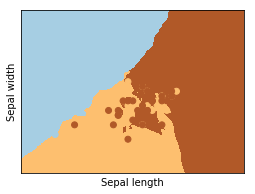

In [29]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X = loan_X_train.as_matrix()
Y = loan_Y_train
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)
loan_Y_pred =clf.predict(loan_X_test)


[ 0.14945878  0.08268154  0.15515877  0.05796624  0.08026127  0.22268213
  0.07378467  0.1175838   0.0604228 ]


In [132]:
#diabetes_X_train = diabetes_X[["Borrower's Obligation",'Original Principal Amount']][:-20].as_matrix()
#diabetes_X_test = diabetes_X[["Borrower's Obligation",'Original Principal Amount']][-20:].as_matrix()

## DecisionTreeClassifier  

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree


tre = DecisionTreeClassifier(random_state=0)
tre = tre.fit(loan_X_train, loan_Y_train)

print('Accuracy on the training subset: {:.3f}'.format(tre.score(loan_X_train, loan_Y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tre.score(loan_X_test, loan_Y_test)))




Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.998


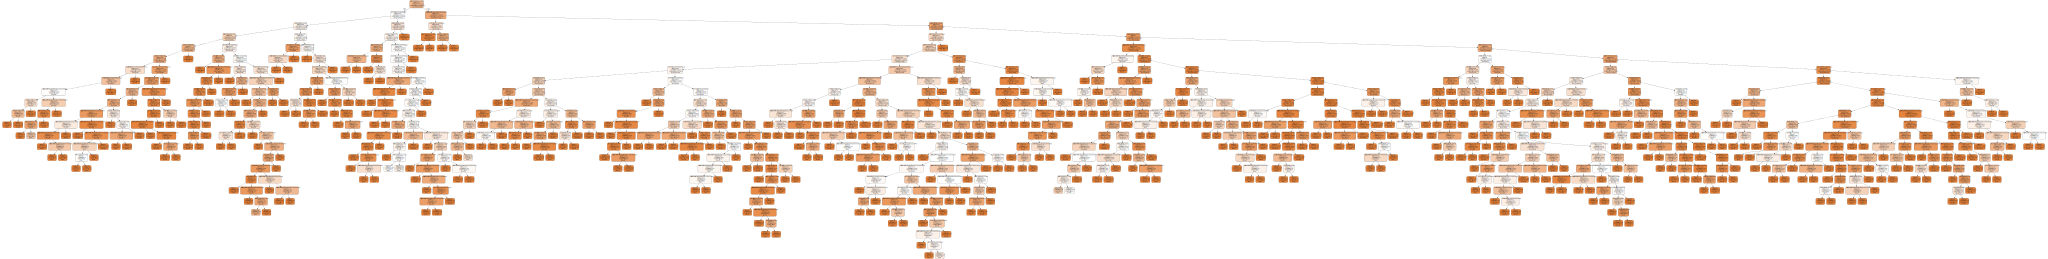

In [8]:






import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tre, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("loan") 
dot_data = tree.export_graphviz(tre, out_file=None,
                                feature_names=list(loan_X_train.columns.values),
                                class_names=list(loan_Y_train.columns.values),
                                filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)  
graph

In [ ]:

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tre, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("loan") 
dot_data = tree.export_graphviz(tre, out_file=None,
                                feature_names=list(loan_X_train.columns.values),
                                class_names=list(loan_Y_train.columns.values),
                                filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)  
graph

In [15]:
#diabetes_X_train = diabetes_X[["Borrower's Obligation",'Original Principal Amount']][:-20].as_matrix()
#diabetes_X_test = diabetes_X[["Borrower's Obligation",'Original Principal Amount']][-20:].as_matrix()

In [27]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


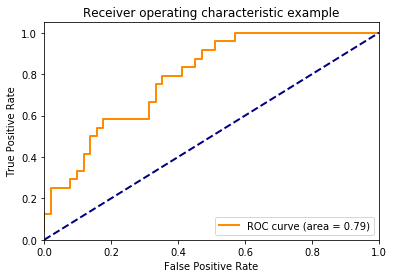

In [28]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()